<a href="https://colab.research.google.com/github/paucaroscanoa/Series-de-Tiemop---UNI/blob/master/Modelo_ARCH_GARCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo GARCH


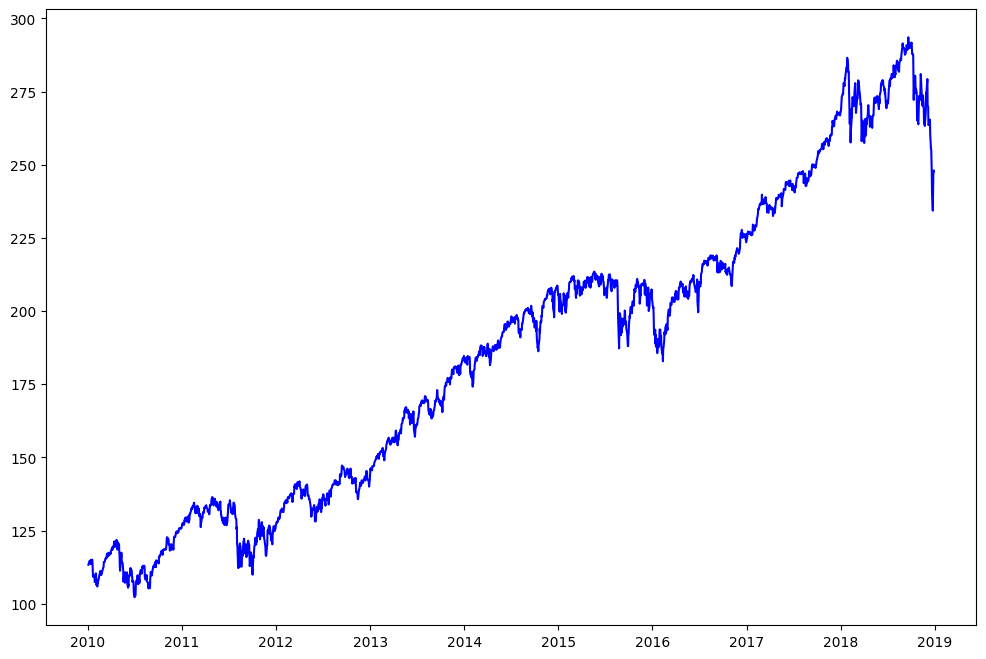

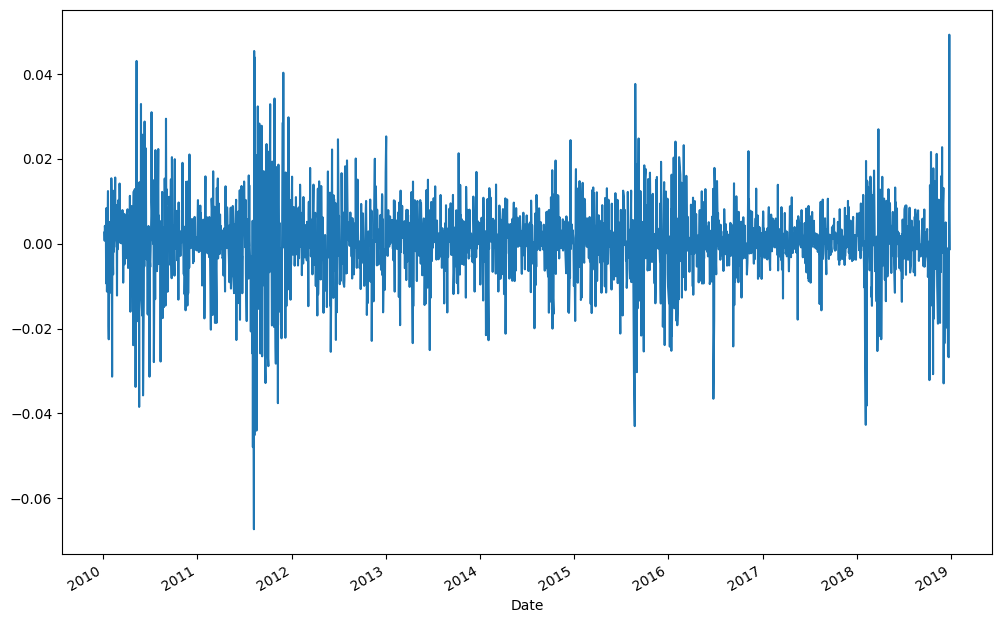

<Axes: xlabel='Date'>

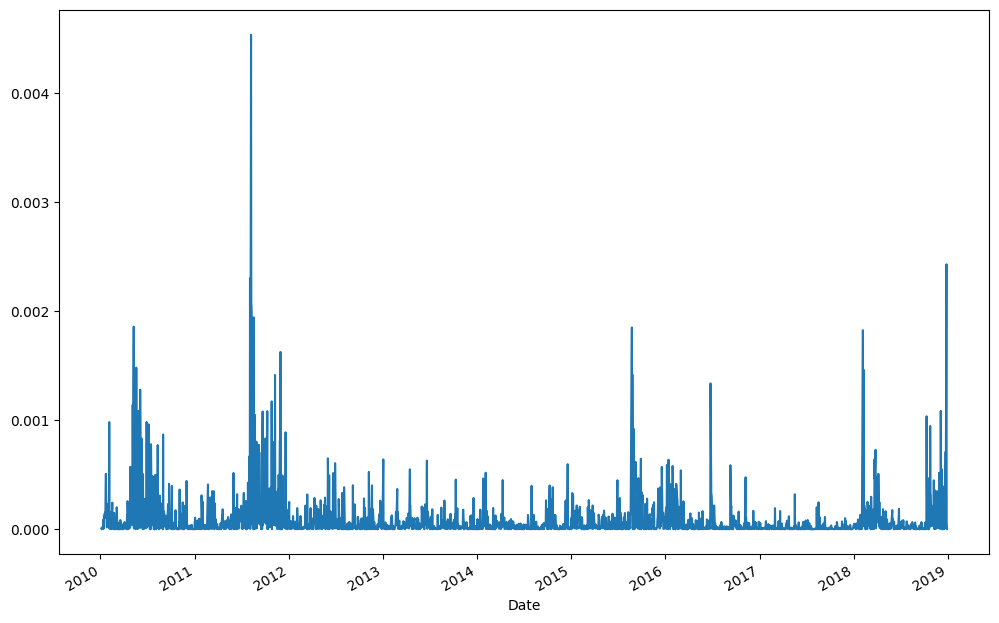

In [68]:
# @title Texto de título predeterminado
#!pip install -U arch statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Analisis descriptivo
#lectura de los datos
df=pd.read_csv('SPY.csv', parse_dates=True, index_col=0)
df['Close']
plt.figure(figsize=(12,8))
plt.plot(df['Close'], label='Log Return', color='blue')
plt.show()
#Calculo de los rendimiento logaritmicos
df['LogRet']=np.log(df['Close']).diff()
#nuevo marco de datos que recoge todo excepto la primera fila
df2=df.iloc[1:].copy()
#Gráfico para volatilidad
df2['LogRet'].plot(figsize=(12,8))
plt.show()
#cuadrado de los rendimientos logaritmicos
df2['Ysq']=df['LogRet']**2
#Gráfico para volatilidad al cuadrado
df2['Ysq'].plot(figsize=(12,8))


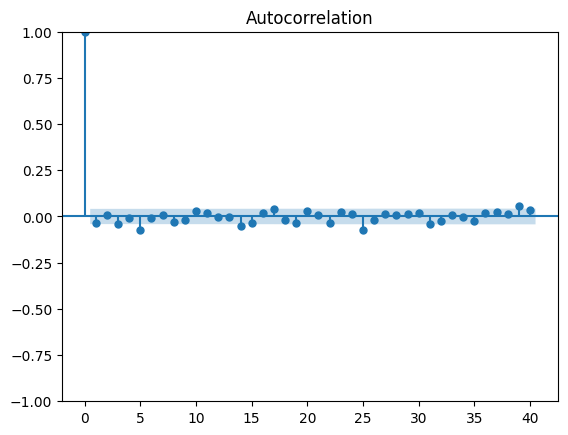

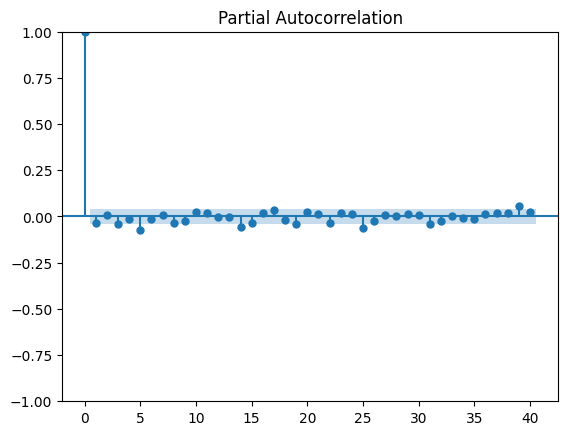

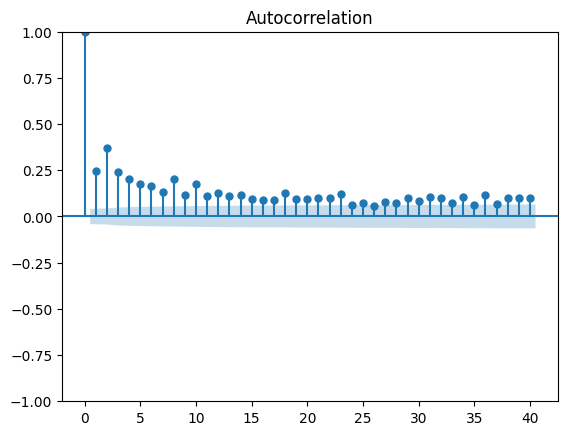

Se observan muchos desfaces significativos


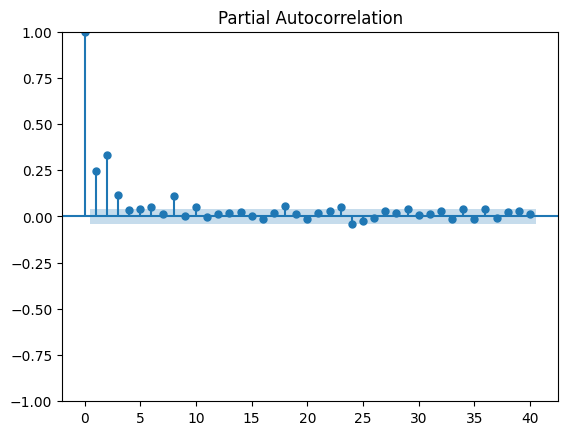

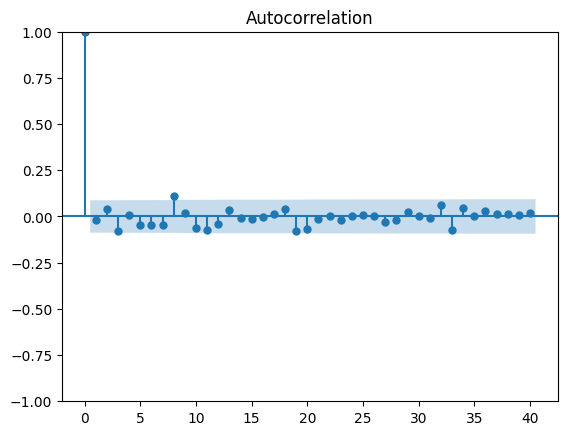

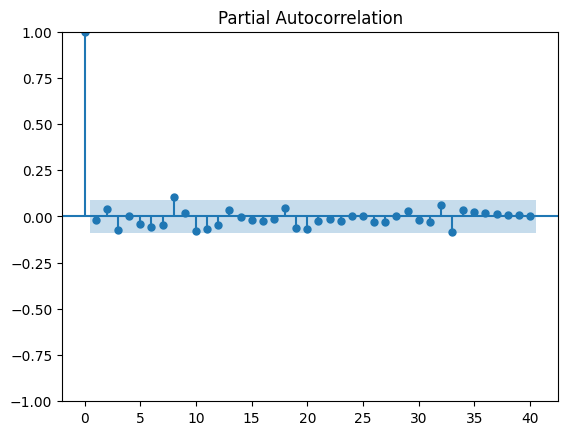

In [69]:
#Cálculo ACF and PACF
plot_acf(df2['LogRet'], lags=40)
plt.show()
plot_pacf(df2['LogRet'], lags=40)
plt.show()
plot_acf(df2['Ysq'], lags=40)
plt.show()
print("Se observan muchos desfaces significativos")
plot_pacf(df2['Ysq'], lags=40)
plt.show()
#Comparación ACF y PACF ruidbo blanco
noise_sq=np.random.randn(500)**2
plot_acf(noise_sq, lags=40)
plt.show()
plot_pacf(noise_sq, lags=40)
plt.show()



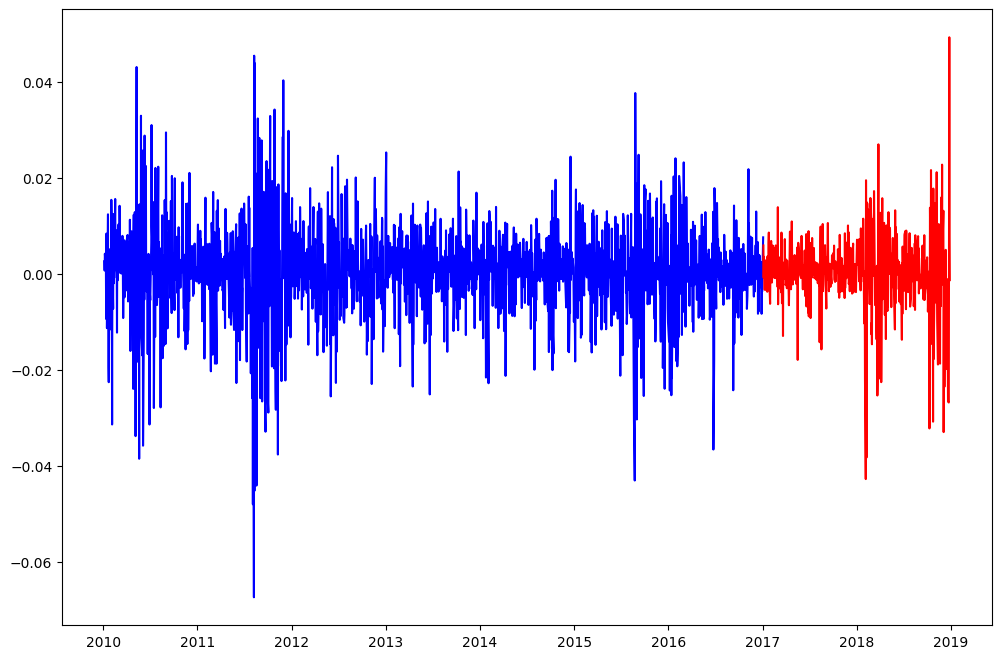

In [70]:
#Dividir los datos para entrenamiento y prueba (Train - Test Split)
Ntest=500
train=df2.iloc[:-Ntest][['LogRet']].copy()
test=df2.iloc[-Ntest:][['LogRet']].copy()
plt.figure(figsize=(12,8))
plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Test', color='red')
plt.show()



In [71]:
#Porque necesitamos standarizar?
#leer advertencia de la salida de los resultados
model=arch_model(train['LogRet'], vol='GARCH', p=1, q=1)
res=model.fit()




Iteration:      1,   Func. Count:      6,   Neg. LLF: 2668736234320.3926
Iteration:      2,   Func. Count:     19,   Neg. LLF: 681495796603480.9
Iteration:      3,   Func. Count:     34,   Neg. LLF: 2099329788588.272
Iteration:      4,   Func. Count:     47,   Neg. LLF: 1148800069593708.8
Iteration:      5,   Func. Count:     62,   Neg. LLF: 20672973870.71515
Iteration:      6,   Func. Count:     75,   Neg. LLF: 1.0138966357037168e+16
Iteration:      7,   Func. Count:     90,   Neg. LLF: 1121326932594.181
Iteration:      8,   Func. Count:    103,   Neg. LLF: 207123748884025.1
Iteration:      9,   Func. Count:    118,   Neg. LLF: 14017524989.133617
Iteration:     10,   Func. Count:    131,   Neg. LLF: 275892953358924.4
Iteration:     11,   Func. Count:    145,   Neg. LLF: -5876.685308750586
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5876.68531086581
            Iterations: 15
            Function evaluations: 145
            Gradient evalu

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.532e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [73]:
m=train['LogRet'].mean()
s=train['LogRet'].std()
train['Scaled']=(train['LogRet']-m)/s
test['Scaled']=(test['LogRet']-m)/s
df2['Scaled']=(df2['LogRet']-m)/s

arch1=arch_model(train['Scaled'], vol='ARCH', p=1)
res_arch1=arch1.fit(update_freq=10)
res_arch1.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2457.9840288310843
            Iterations: 6
            Function evaluations: 32
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                 Scaled   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2457.98
Distribution:                  Normal   AIC:                           4921.97
Method:            Maximum Likelihood   BIC:                           4938.39
                                        No. Observations:                 1762
Date:                Fri, Nov 08 2024   Df Residuals:                     1761
Time:                        15:49:01   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0127  2.325e-02      0.545      0.586 [-3.291e-02,5.825e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.8188  6.722e-02     12.181  3.936e-34   [  0.687,  0.951]
alpha[1]       0.1771  4.774e-02      3.709  2.079e-04 [8.350e-02,  0.271]
==========================================================================

Covariance estimator: robust
"""

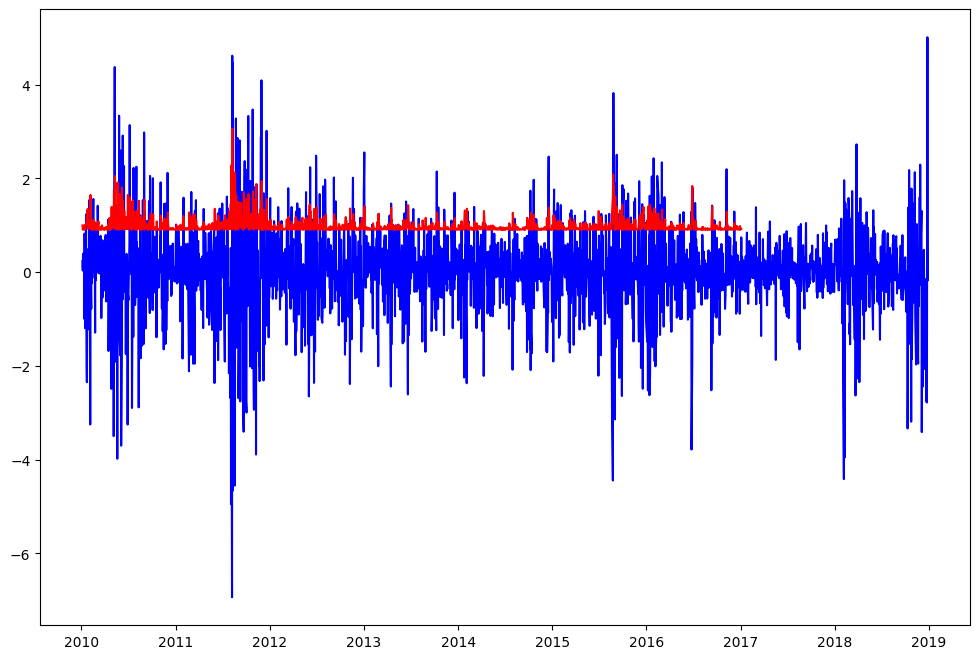

In [75]:
#Predicciones preliminares
df2['ARCH(1)']=res_arch1.conditional_volatility
plt.figure(figsize=(12,8))
plt.plot(df2['Scaled'], label='Train', color='blue')
plt.plot(df2['ARCH(1)'], label='Test', color='red')
plt.show()


In [79]:
res_arch1.forecast(horizon=Ntest)

In [85]:
fcast_arch1=res_arch1.forecast(horizon=Ntest, reindex=False)
print(fcast_arch1)
print(fcast_arch1.mean)
print(fcast_arch1.variance)
print(fcast_arch1.residual_variance)
fcast_arch1=res_arch1.forecast(horizon=Ntest, reindex=False)
print(fcast_arch1.mean)

               h.001     h.002     h.003     h.004     h.005     h.006  \
Date                                                                     
2017-01-03  0.012671  0.012671  0.012671  0.012671  0.012671  0.012671   

               h.007     h.008     h.009     h.010  ...     h.491     h.492  \
Date                                                ...                       
2017-01-03  0.012671  0.012671  0.012671  0.012671  ...  0.012671  0.012671   

               h.493     h.494     h.495     h.496     h.497     h.498  \
Date                                                                     
2017-01-03  0.012671  0.012671  0.012671  0.012671  0.012671  0.012671   

               h.499     h.500  
Date                            
2017-01-03  0.012671  0.012671  

[1 rows x 500 columns]
               h.001    h.002     h.003     h.004     h.005     h.006  \
Date                                                                    
2017-01-03  0.912612  0.98042  0.992427  0.9945

<Axes: xlabel='Date'>

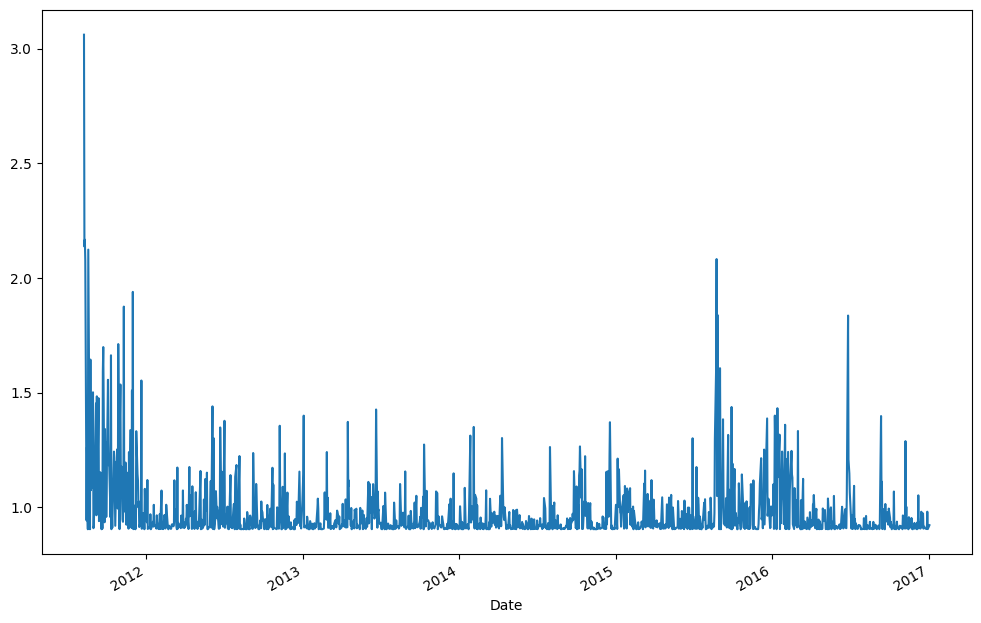

In [86]:
#Muestra las previsiones desde la fecha indicada, muestra la volatilidad condicional
#que el modelo ha aprendido a partir de una fecha indicada
#esta se encuentr acumulada en la columna ARCH(1)
df2.loc['2011-08-09':]['ARCH(1)'].plot(figsize=(12,8))

In [89]:
fcast_arch1=res_arch1.forecast(horizon=Ntest, reindex=True, start='2011-08-01')

In [90]:
#comprovar las varianzas de la previisón para las fechas próximas a la fecha de incio
fcast_arch1.variance['2011-07-28':'2011-08-05']


,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2011-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,0.861165,0.971311,0.990814,0.994267,0.994879,0.994987,0.995006,0.995009,0.995010,0.995010,...,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501
2011-08-02,2.112095,1.192807,1.030033,1.001211,0.996108,0.995205,0.995045,0.995016,0.995011,0.995010,...,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501
2011-08-03,0.863233,0.971677,0.990879,0.994279,0.994881,0.994987,0.995006,0.995009,0.995010,0.995010,...,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501
2011-08-04,5.183712,1.736683,1.126334,1.018263,0.999127,0.995739,0.995139,0.995033,0.995014,0.995011,...,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501
2011-08-05,0.826340,0.965145,0.989722,0.994074,0.994844,0.994981,0.995005,0.995009,0.995010,0.995010,...,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501


In [91]:
#Optener la forma de una sola fila la previsión de varianza
fcast_arch1.variance.loc['2011-08-09'].to_numpy().shape
#devuelve la cantidad de datos

(500,)

In [96]:
#El siguiente pasao es optener la fecha que nos interesa
df2.index.get_loc('2011-08-09')

402

In [98]:
#Valor del indice en la posición 402+500
df2.index[402+500]

Timestamp('2013-08-06 00:00:00')

In [100]:
# Toma lo que acaba de aprender y almacena el pronóstico de la varianza en un marco de datos
df2.loc['2011-08-10':'2013-08-06','ARCH(1) Forecast']=np.sqrt(fcast_arch1.variance.loc['2011-08-09'].to_numpy())

<Axes: xlabel='Date'>

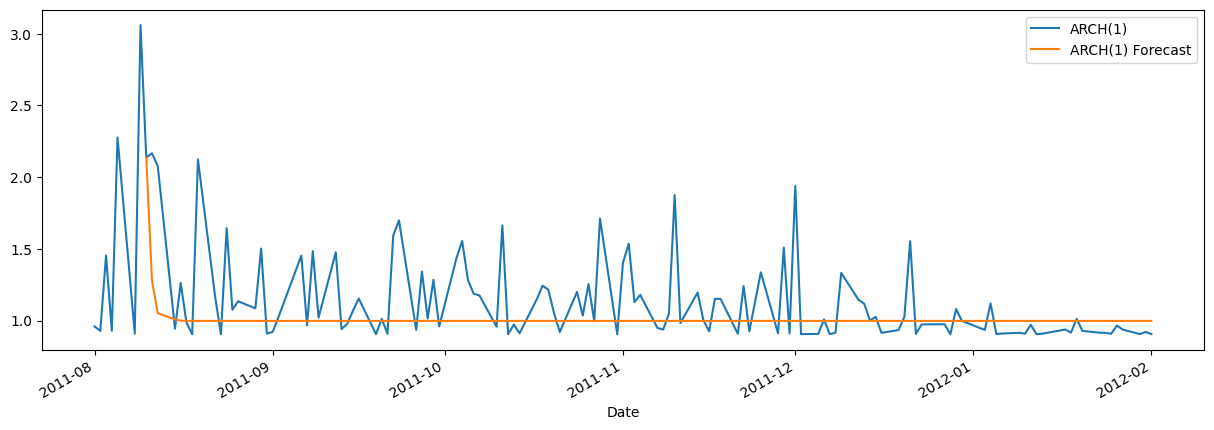

In [101]:
#Graficar la prevision junto con la volatilidad prevista.
df2.loc['2011-08-01':'2012-02-01'][['ARCH(1)','ARCH(1) Forecast']].plot(figsize=(15,5))

In [102]:
fcast_arch1.variance.index.get_loc('2011-08-17')

408

In [103]:
df2.index[408+500]

Timestamp('2013-08-14 00:00:00')

In [106]:
df2.loc['2011-08-18':'2013-08-14','ARCH(1) Forecast Low']=np.sqrt(fcast_arch1.variance.loc['2011-08-17'].to_numpy())

<Axes: xlabel='Date'>

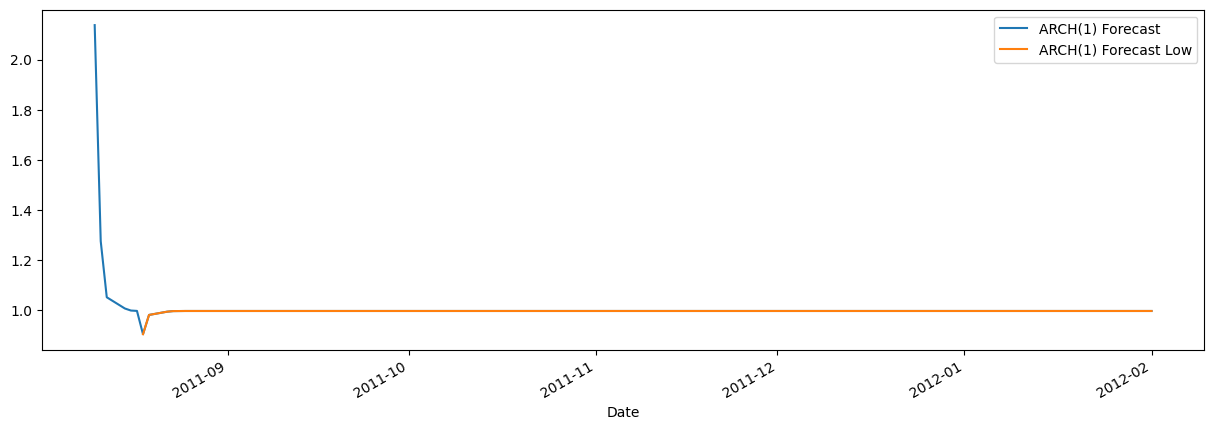

In [107]:
plot_cols=['ARCH(1) Forecast','ARCH(1) Forecast Low']
df2.loc['2011-08-01':'2012-02-01'][plot_cols].plot(figsize=(15,5))

In [111]:
#Varianza incodicional teórica
res_arch1.params

,params
mu,0.012671
omega,0.818829
alpha[1],0.177065


In [112]:
res_arch1.params['omega']/(1-res_arch1.params['alpha[1]'])

0.9950100810516654

In [113]:
fcast_arch1.variance.loc['2011-08-17'].to_numpy()[-1]

0.9950100810516654

In [114]:
fcast_arch1.variance.loc['2011-08-09'].to_numpy()[-1]

0.9950100810516654

GARCH


In [115]:
garch11=arch_model(train['Scaled'], vol='GARCH', p=1, q=1)
res_garch11=garch11.fit(update_freq=10)
res_garch11.summary()

Iteration:     10,   Func. Count:     62,   Neg. LLF: 2269.107952003156
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2269.107941826056
            Iterations: 12
            Function evaluations: 71
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 Scaled   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2269.11
Distribution:                  Normal   AIC:                           4546.22
Method:            Maximum Likelihood   BIC:                           4568.11
                                        No. Observations:                 1762
Date:                Fri, Nov 08 2024   Df Residuals:                     1761
Time:                        17:07:13   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0287  1.865e-02      1.538      0.124 [-7.863e-03,6.525e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0469  1.060e-02      4.427  9.560e-06 [2.615e-02,6.770e-02]
alpha[1]       0.1499  2.499e-02      6.000  1.972e-09     [  0.101,  0.199]
beta[1]        0.8021  2.545e-02     31.516 5.231e-218     [  0.752,  0.852]
============================================================================

Covariance estimator: robust
"""

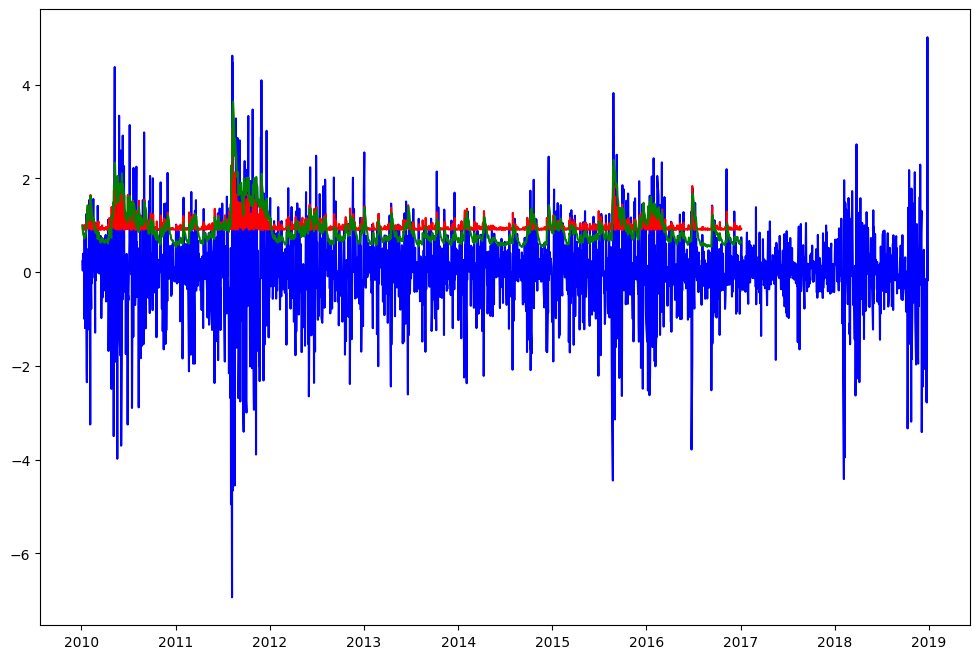

In [118]:
#Modelo
df2['GARCH(1,1)']=res_garch11.conditional_volatility
plt.figure(figsize=(12,8))
plt.plot(df2['Scaled'], label='Train', color='blue')
plt.plot(df2['ARCH(1)'], label='Test', color='red')
plt.plot(df2['GARCH(1,1)'], label='Test', color='green')
plt.show()

In [120]:
fcast_garch11=res_garch11.forecast(horizon=Ntest, reindex=False, start='2011-08-09')

In [121]:
df2.loc['2011-08-10':'2013-08-06','GARCH(1,1) Forecast']=np.sqrt(fcast_garch11.residual_variance.loc['2011-08-09'].to_numpy())

In [123]:
df2['AbsScaled']=df2['Scaled'].abs()

<Axes: xlabel='Date'>

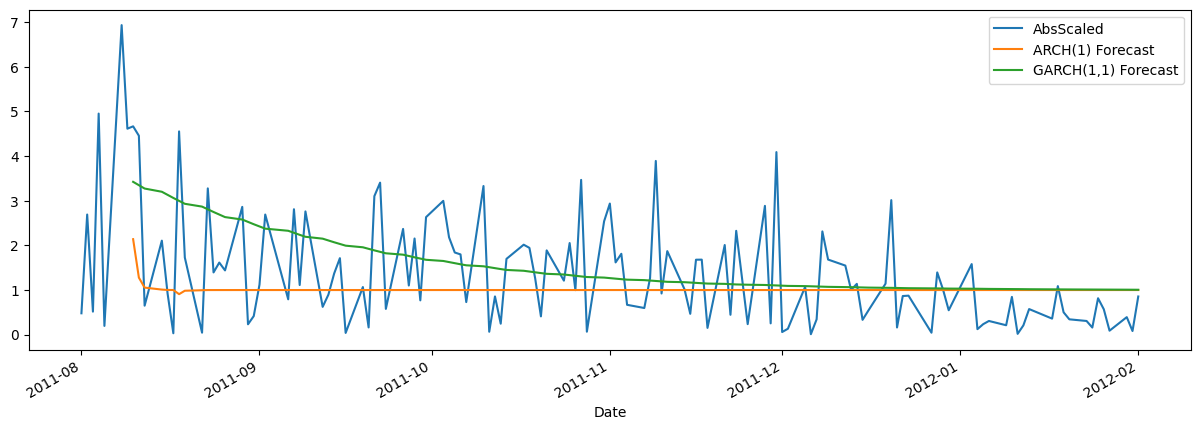

In [124]:
#Verificar que el modelo GARCH tiene un mejor predicción de los valores
plot_cols=['AbsScaled','ARCH(1) Forecast','GARCH(1,1) Forecast']
df2.loc['2011-08-01':'2012-02-01'][plot_cols].plot(figsize=(15,5))